In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
advertising = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv')
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [3]:
advertising.shape


(392, 9)

In [4]:
advertising.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


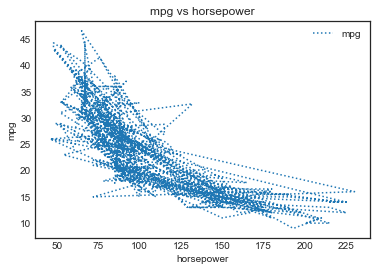

In [22]:
advertising.plot(x='horsepower', y='mpg', style=':')
plt.title('mpg vs horsepower')  
plt.xlabel('horsepower')  
plt.ylabel('mpg')  
plt.show()

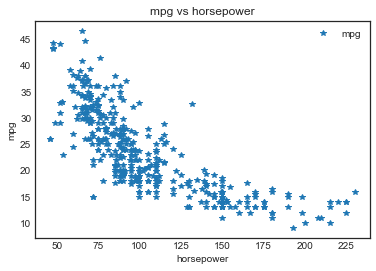

In [23]:
advertising.plot(x='horsepower', y='mpg', style='*')
plt.title('mpg vs horsepower')  
plt.xlabel('horsepower')  
plt.ylabel('mpg')  
plt.show()

In [6]:

X = advertising['horsepower'].values.reshape(-1,1)
y = advertising['mpg'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [7]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [8]:
#To retrieve the intercept:
print(regressor.intercept_)



#For retrieving the slope:
print(regressor.coef_)

[39.92365064]
[[-0.15758676]]


In [9]:
y_pred = regressor.predict(X_test)

In [10]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.0,28.104644
1,22.3,26.056016
2,12.0,14.709770
3,38.0,29.995685
4,33.8,29.365338
5,19.4,25.740843
6,38.1,30.468445
7,30.0,29.365338
8,20.0,24.952909
9,20.0,26.056016


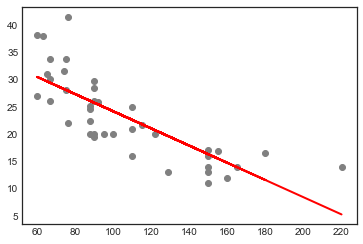

In [11]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.6522380199554347


In [13]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.81114253145181


In [14]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.670240093555342


In [15]:
mod = smf.ols(formula = "mpg ~ horsepower", data = advertising)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        22:21:18   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [16]:

predictionset = res.predict(pd.DataFrame({"horsepower": [98]}))
print(predictionset)

0    24.467077
dtype: float64
